In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


blue = '#003262'
gold = '#FDB515'

In [2]:
# Load the data
df = pd.read_csv('./data/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
# let's see the unique personality types
df['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

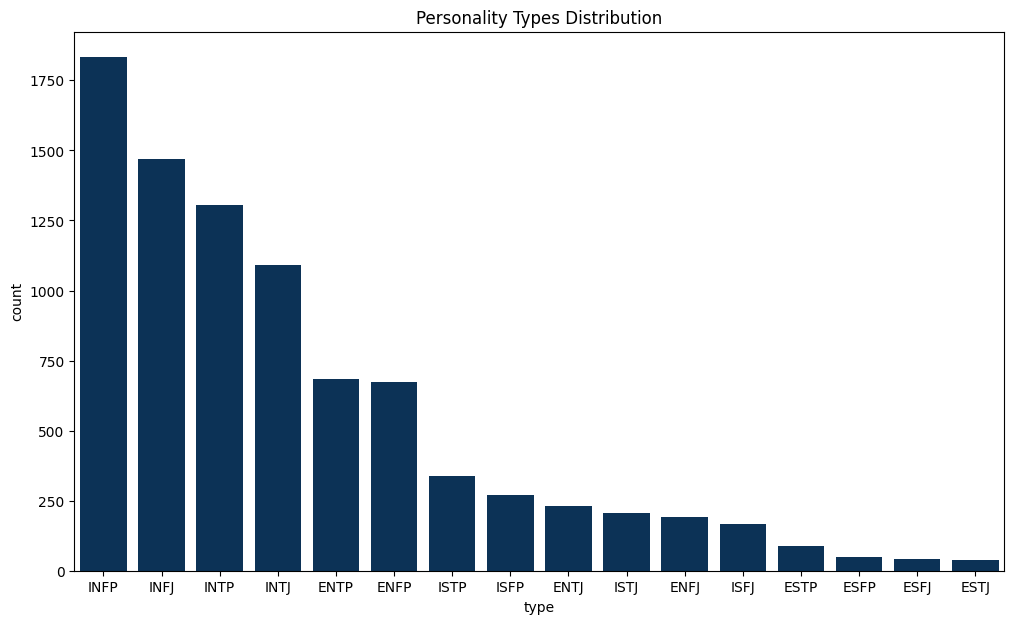

In [4]:
# let's see the distribution of the personality types
plt.figure(figsize=(12,7))
sns.countplot(x='type', data=df, order = df['type'].value_counts().index, color=blue)
plt.ylabel('count')
plt.title('Personality Types Distribution')
plt.show()

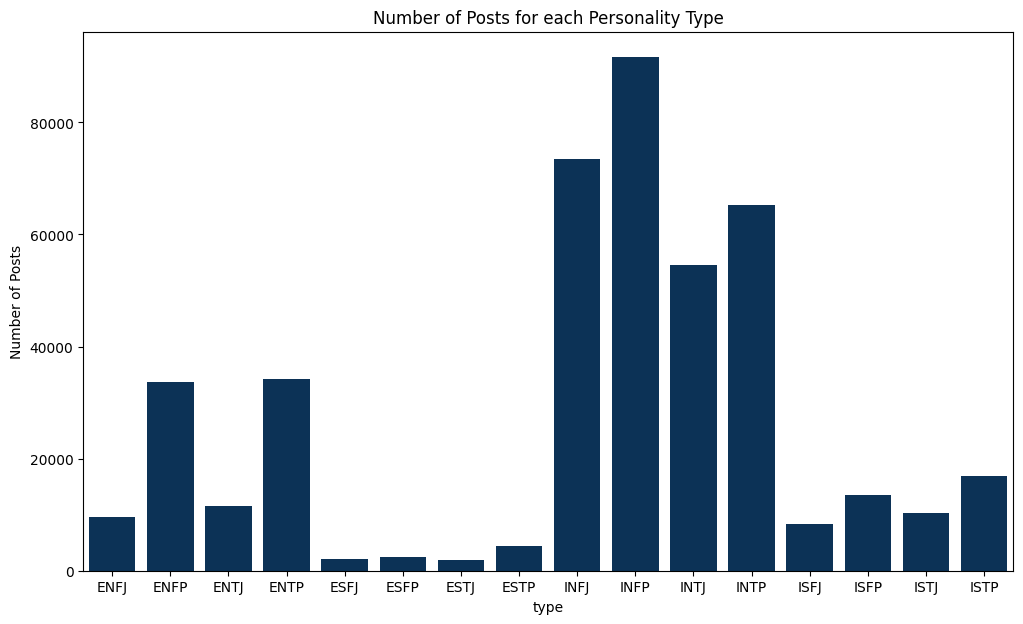

In [5]:
# But each row of data consists of 50 posts, so more accurately, we should count the number of posts for each personality type
num_posts_per_type = df.groupby('type').count()*50

plt.figure(figsize=(12,7))
sns.barplot(x=num_posts_per_type.index, y=num_posts_per_type['posts'], color=blue)
plt.ylabel('Number of Posts')
plt.title('Number of Posts for each Personality Type')
plt.show()

In [6]:
df.shape

(8675, 2)

In [7]:
df.isnull().sum()

type     0
posts    0
dtype: int64

In [8]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [9]:
# Let's see an example of posts
df['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [10]:
for post in df['posts'][0].split('|||'):
    print(len(post.split()))

1
1
12
10
8
6
20
37
5
3
4
33
33
38
20
1
7
6
8
38
10
17
10
1
8
20
1
1
1
15
10
11
7
1
37
10
1
1
1
1
1
22
20
17
1
13
11
40
13
12


In [11]:
def count_words(row):
    count = 0
    for post in row.split("|||"):
        count += len(post.split()) / 50
    return count

df['words_per_post'] = df['posts'].apply(count_words)

df.head()

,type,posts,words_per_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,12.10
1,ENTP,'I'm finding the lack of me in these posts ver...,24.38
2,INTP,'Good one _____ https://www.youtube.com/wat...,17.70
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",22.26
4,ENTJ,'You're fired.|||That's another silly misconce...,20.32


C:\Users\qmirz\AppData\Local\Temp\ipykernel_29220\3074815845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='type', y='words_per_post', data=df, palette='viridis')
c:\Users\qmirz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\qmirz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\qmirz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 75.7% of the points cannot be placed; you may want to

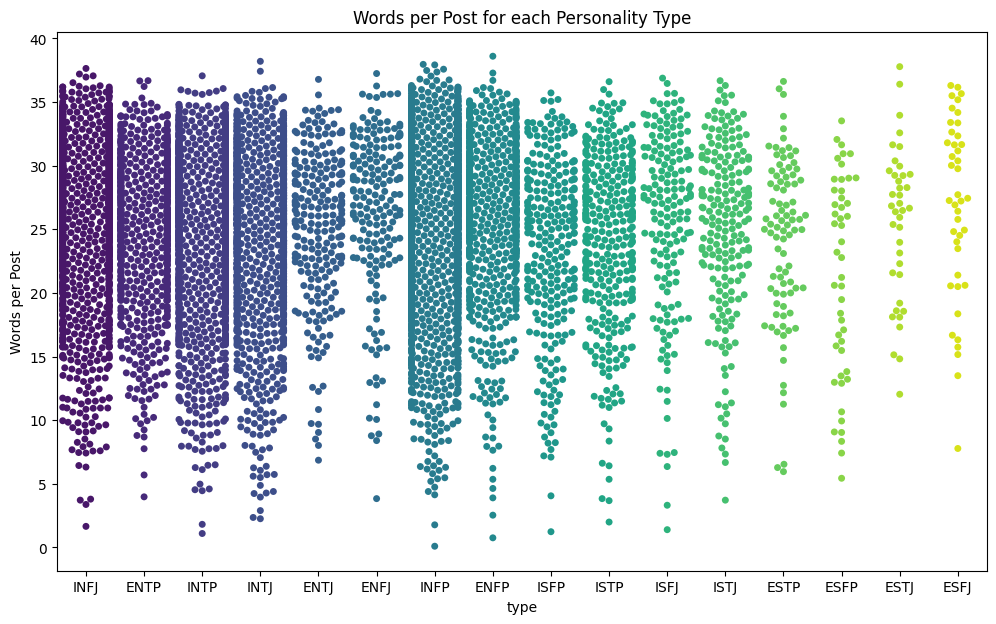

In [12]:
# make swarm plot
plt.figure(figsize=(12,7))
sns.swarmplot(x='type', y='words_per_post', data=df, palette='viridis')
plt.ylabel('Words per Post')
plt.title('Words per Post for each Personality Type')
plt.show()

C:\Users\qmirz\AppData\Local\Temp\ipykernel_29220\27205490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['words_per_post'], color=blue)


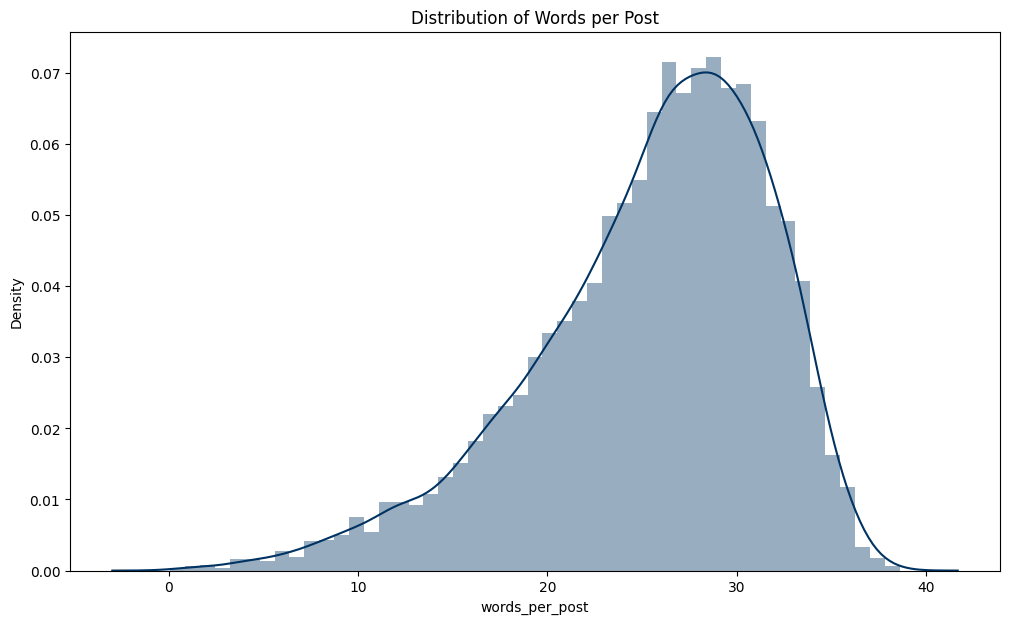

In [13]:
# vizualize the distribution of words per post
plt.figure(figsize=(12,7))
sns.distplot(df['words_per_post'], color=blue)
plt.title('Distribution of Words per Post')
plt.show()

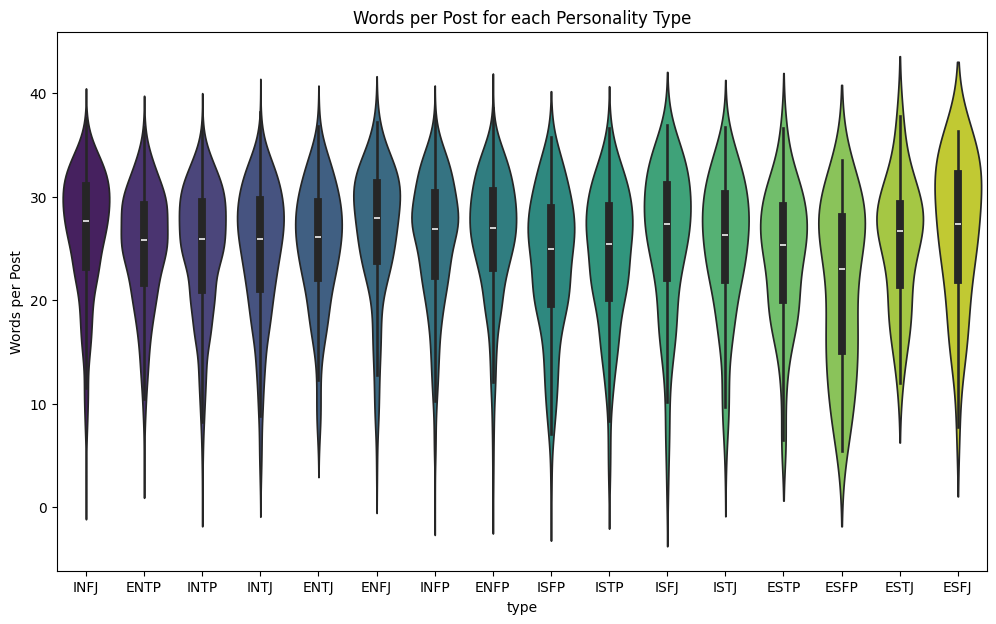

In [14]:
# let's plot the distribution of words per post for each type

plt.figure(figsize=(12,7))
sns.violinplot(x='type', y='words_per_post', data=df, palette='viridis', hue='type', legend=False)
plt.ylabel('Words per Post')
plt.title('Words per Post for each Personality Type')
plt.show()

In [15]:
# Clean up the posts
import re

def clean_text(text):
    # remove urls
    text = re.sub(r'http\S+', '', text)
    # remove emails
    text = re.sub('\S+@\S+', '', text)
    # remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # remove non-alphabets
    text = re.sub('[^a-zA-Z]', ' ', text)
    # convert to lower case
    text = text.lower()
    # remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    # Remove MBTI personality types
    text = re.sub('INFJ|ENTP|INTP|INTJ|ENTJ|ENFJ|INFP|ENFP|ISFP|ISTP|ISFJ|ISTJ|ESTP|ESFP|ESTJ|ESFJ'.lower(), '', text)
    
    return text

df['cleaned_posts'] = df['posts'].apply(clean_text)
df.head()

,type,posts,words_per_post,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,12.10,and moments sportscenter not top ten plays ...
1,ENTP,'I'm finding the lack of me in these posts ver...,24.38,i m finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,17.70,good one course to which say know tha...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",22.26,dear enjoyed our conversation the other day...
4,ENTJ,'You're fired.|||That's another silly misconce...,20.32,you re fired that s another silly misconce...


In [16]:
# Get relevant columns
df = df[['type', 'cleaned_posts']]

In [17]:
df.head()

,type,cleaned_posts
0,INFJ,and moments sportscenter not top ten plays ...
1,ENTP,i m finding the lack of me in these posts ver...
2,INTP,good one course to which say know tha...
3,INTJ,dear enjoyed our conversation the other day...
4,ENTJ,you re fired that s another silly misconce...


In [18]:
# Use label encoding to convert the personality types to numbers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_type'] = label_encoder.fit_transform(df['type'])

# print the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [19]:
label_mapping

{'ENFJ': 0,
 'ENFP': 1,
 'ENTJ': 2,
 'ENTP': 3,
 'ESFJ': 4,
 'ESFP': 5,
 'ESTJ': 6,
 'ESTP': 7,
 'INFJ': 8,
 'INFP': 9,
 'INTJ': 10,
 'INTP': 11,
 'ISFJ': 12,
 'ISFP': 13,
 'ISTJ': 14,
 'ISTP': 15}

In [20]:
df.head(15)

,type,cleaned_posts,encoded_type
0,INFJ,and moments sportscenter not top ten plays ...,8
1,ENTP,i m finding the lack of me in these posts ver...,3
2,INTP,good one course to which say know tha...,11
3,INTJ,dear enjoyed our conversation the other day...,10
4,ENTJ,you re fired that s another silly misconce...,2
5,INTJ,is not perfect no scientist claims tha...,10
6,INFJ,no can t draw on my own nails haha those ...,8
7,INTJ,i tend to build up collection of things on my...,10
8,INFJ,i m not sure that s good question the distin...,8
9,INTP,in this position where have to actually let ...,11


In [21]:
# remove stop words
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['cleaned_posts'])

In [22]:
vectors.shape

(8675, 96095)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, df['encoded_type'], test_size=0.2, random_state=42)

In [24]:
# print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6940, 96095)
(1735, 96095)
(6940,)
(1735,)


In [25]:
# train multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [27]:
import tqdm

# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': xgb.XGBClassifier()
}

# train the models
for name, model in models.items():
    with tqdm.tqdm(total=100, desc=f"Training {name}", dynamic_ncols=True) as pbar:
        model.fit(X_train, y_train)
        print(name + ' trained.')
        pbar.update(100)

Training Logistic Regression:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\qmirz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training Logistic Regression: 100%|██████████| 100/100 [00:32<00:00,  3.03it/s]


Logistic Regression trained.


Training SVM: 100%|██████████| 100/100 [04:54<00:00,  2.95s/it]


SVM trained.


Training Random Forest: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Random Forest trained.


Training Naive Bayes: 100%|██████████| 100/100 [00:00<00:00, 1098.25it/s]


Naive Bayes trained.


Training XGBoost: 100%|██████████| 100/100 [01:39<00:00,  1.00it/s]

XGBoost trained.


In [30]:
# model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create a dictionary to store the results
results = {}

# Get accuracy results for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy * 100

# print the results
results

{'Logistic Regression': 36.945244956772335,
 'SVM': 37.17579250720461,
 'Random Forest': 25.994236311239195,
 'Naive Bayes': 32.79538904899135,
 'XGBoost': 35.21613832853026}

In short the models are underfitting. Moving forward, what I'd like to try is instead of categorizing all 16 MBTI, what if we just categorize their temperaments? But it begs question, is there really no way to predict someone's MBTI based on their posts? This is something I'll look into when I get the chance